In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
import random

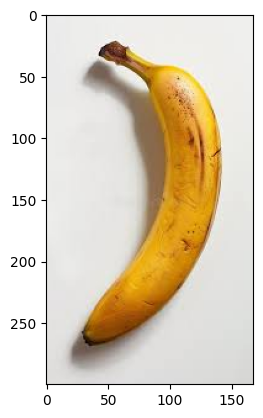

In [2]:
img =  image.load_img('test/b3.jpg')
plt.imshow(img)

In [3]:
cv2.imread('test/b3.jpg').shape


(300, 168, 3)

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\train',
                                          target_size = (200,200),
                                          batch_size = 64,
                                          class_mode = 'categorical' )

validation_dataset = validation.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\val',
                                                    target_size = (200, 200),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 915 images belonging to 5 classes.
Found 146 images belonging to 5 classes.


In [6]:
train_dataset.class_indices
validation_dataset.class_indices

{'banana': 0, 'cup': 1, 'pen': 2, 'phone': 3, 'specs': 4}

In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [8]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [21]:
# model = Sequential([
#     Conv2D(16,(3,3), activation='relu', input_shape = (200, 200, 3)),
#     MaxPooling2D((2,2)),
    
#     Conv2D(32,(3,3), activation='relu'),
#     MaxPooling2D((2,2)),
    
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(5, activation='softmax')
# ])
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),  # Layer 1
    MaxPooling2D((2, 2)),                                             # Layer 2
    
    Flatten(),                                                        # Layer 3
    Dense(5, activation='softmax')                                    # Layer 4
])

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Display a summary of the model
# model.summary()
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',           # Watch validation loss
    mode='min',                   # Stop when validation loss stops decreasing
    patience=3,                   # Allow 3 epochs of no improvement
    restore_best_weights=True     # Restore weights from the best epoch
)


In [23]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 145s 8s/step - accuracy: 0.3379 - loss: 10.9750 - val_accuracy: 0.4315 - val_loss: 4.9499
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.5422 - loss: 2.8357 - val_accuracy: 0.7671 - val_loss: 0.8218
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8407 - loss: 0.5331 - val_accuracy: 0.7466 - val_loss: 0.9262
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.8811 - loss: 0.3320 - val_accuracy: 0.8630 - val_loss: 0.5991
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.9667 - loss: 0.1115 - val_accuracy: 0.8767 - val_loss: 0.5315
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.9904 - loss: 0.0699 - val_accuracy: 0.8904 - val_loss: 0.5539
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9916 - loss: 0.0438 - val_accuracy: 0.8630 - val_loss: 0.5627
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9994 - loss: 0.0274 - val_accuracy: 0.8630 - val_los

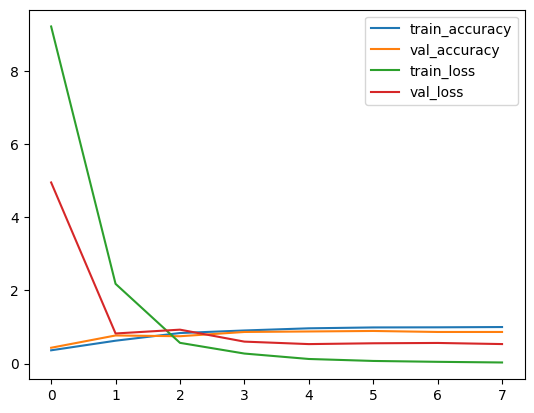

In [24]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with EarlyStopping
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=[early_stopping]    # Pass EarlyStopping as a callback
)

# plotting accuracy against loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Loss
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')


In [25]:
model.evaluate(validation_dataset)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.8856 - loss: 0.4896


[0.5314735174179077, 0.8767123222351074]

In [26]:
class_labels = {v: k for k, v in train_dataset.class_indices.items()}
print(class_labels)

{0: 'banana', 1: 'cup', 2: 'pen', 3: 'phone', 4: 'specs'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.01884589 0.02906327 0.03537494 0.0081078  0.9086081 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
You have found your  specs!,Congratulations


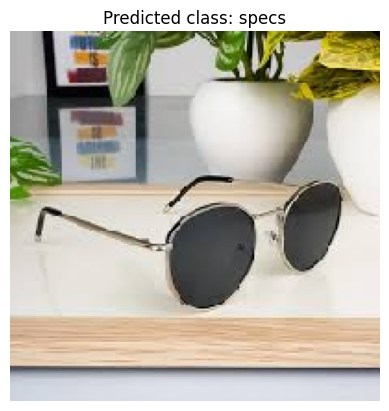

In [44]:
import pyttsx3
test_dir_path = r'C:\\Users\\John\\PycharmProjects\\ML\\multiple_obj_rec\\test'
images  = os.listdir(test_dir_path)
random_image = random.choice(images)
image_path = os.path.join(test_dir_path, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)


prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"You have found your  {class_labels[predicted_class]}!,Congratulations")  # Display the predicted class label

engine = pyttsx3.init()
engine = pyttsx3.init()
# current speech rate

rate = engine.getProperty('rate')

engine.setProperty('rate', rate - 1) 
engine.say(text)
engine.runAndWait()
engine.stop()

print(text)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

Uploading an Image 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[9.9990320e-01 4.4247510e-05 4.7374243e-07 3.0707150e-05 2.1331092e-05]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
198
You have found your  banana!,Congratulations


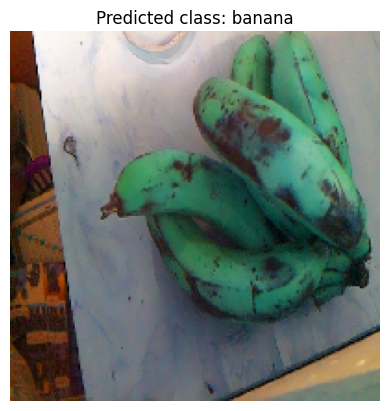

In [28]:
image_path = r'train/banana/bb17.jpg' #load image
img = image.load_img(image_path, target_size=(200, 200)) # resize
img_array = image.img_to_array(img) # convert to an array
img_array = np.expand_dims(img_array, axis = 0)
img_array /=255

prediction = model.predict(img_array)
print(prediction)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get the index of the highest predicted probability

text = (f"You have found your  {class_labels[predicted_class]}!,Congratulations")  # Display the predicted class label

engine = pyttsx3.init()
engine = pyttsx3.init()
# current speech rate

rate = engine.getProperty('rate')
print(rate)
# engine.setProperty('rate', rate - 10) 
engine.say(text)
engine.runAndWait()
engine.stop()

print(text)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {class_labels[predicted_class]}")
plt.show()

In [29]:
model.save('model_5.h5') 

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Convert your Keras model
tflite_model = converter.convert()  # Convert to TFLite format

# Save the TFLite model
with open('model_5.tflite', 'wb') as f:
    f.write(tflite_model)  # This writes the TFLite model to your file system

INFO:tensorflow:Assets written to: C:\Users\John\AppData\Local\Temp\tmpku4u3da8\assets


INFO:tensorflow:Assets written to: C:\Users\John\AppData\Local\Temp\tmpku4u3da8\assets


Saved artifact at 'C:\Users\John\AppData\Local\Temp\tmpku4u3da8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2973895196496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2974006330000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2974006330576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2974006331728: TensorSpec(shape=(), dtype=tf.resource, name=None)
